In [1]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import datetime

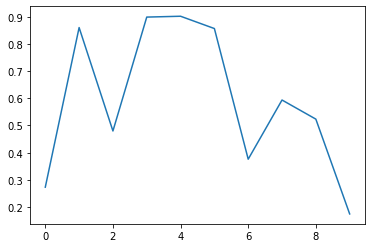

In [14]:
x = np.arange(10)
y = np.random.rand(10)
plt.plot(x, y)

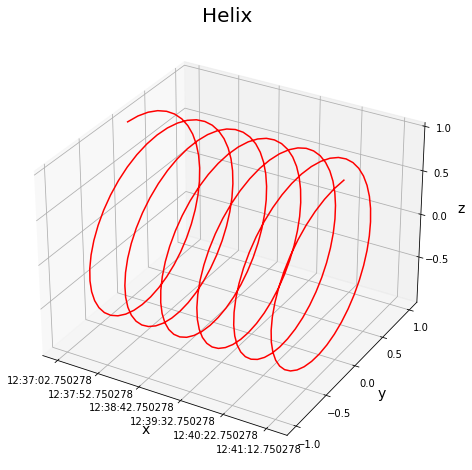

In [48]:
# Figureを追加
fig = plt.figure(figsize = (8, 8))

# 3DAxesを追加
ax = fig.add_subplot(111, projection='3d')

# Axesのタイトルを設定
ax.set_title("Helix", size = 20)

# 軸ラベルを設定
ax.set_xlabel("x", size = 14)
ax.set_ylabel("y", size = 14)
ax.set_zlabel("z", size = 14)

# 軸目盛を設定
ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax.set_zticks([-1.0, -0.5, 0.0, 0.5, 1.0])

# 円周率の定義
pi = np.pi

# パラメータ分割数
n = 256

# パラメータtを作成
t = np.linspace(-6*pi, 6*pi, n)

x0 = datetime.datetime.now()

# らせんの方程式
x_ticks_labels = [x0 + datetime.timedelta(seconds=i) for i in range(256)]

x = np.arange(256)

x_ticks = np.arange(0, 256, 50)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks_labels[i].time() for i in x_ticks)

# print(x)
y = np.sin(t)
z = np.cos(t)

# 曲線を描画
ax.plot(x, y, z, color = "red")

plt.show()

In [49]:
dt = datetime.datetime.now()
dt = dt.replace(year=1999, month=8, day=1, hour=2, minute=5, second=7)
print(dt)
print(type(dt))

1999-08-01 02:05:07.475580
<class 'datetime.datetime'>


In [78]:
# ファイル名指定
f = open(".\\gps_data\\matsumoto-nagano-100318.log")
# 行ごとリスト化
row_list = f.readlines()
# ファイルを閉じる
f.close()

# $GPRMC と $GPGGA のみ取り出す
gprmc = []
gpgga = []

for i in row_list:
    # 末尾の要素は改行文字
    if i[-1] == '\n':
        i = i[:-1]
    # カンマ区切りでタプルに変換
    # 先頭も省略
    tmp_list = i.split(",")
    if tmp_list[0] == "$GPRMC":
        gprmc.append(tuple(tmp_list[1:]))
    elif tmp_list[0] == "$GPGGA":
        gpgga.append(tuple(tmp_list[1:]))

print(gprmc)
# print(gpgga)

del row_list

[('061959', 'A', '3614.2227', 'N', '13759.6135', 'E', '021.3', '276.9', '180310', '', '', 'A*7E'), ('062009', 'A', '3614.2298', 'N', '13759.5359', 'E', '021.8', '276.3', '180310', '', '', 'A*7F'), ('062028', 'A', '3614.2575', 'N', '13759.4495', 'E', '000.3', '254.1', '180310', '', '', 'A*74'), ('062043', 'A', '3614.2540', 'N', '13759.4548', 'E', '000.8', '102.0', '180310', '', '', 'A*74'), ('062058', 'A', '3614.2429', 'N', '13759.4589', 'E', '006.5', '270.7', '180310', '', '', 'A*77'), ('062113', 'A', '3614.2276', 'N', '13759.3749', 'E', '020.8', '245.2', '180310', '', '', 'A*76'), ('062125', 'A', '3614.2174', 'N', '13759.2913', 'E', '020.9', '278.6', '180310', '', '', 'A*79'), ('062136', 'A', '3614.2274', 'N', '13759.2092', 'E', '022.3', '275.8', '180310', '', '', 'A*73'), ('062151', 'A', '3614.2357', 'N', '13759.1076', 'E', '018.8', '279.6', '180310', '', '', 'A*7B'), ('062206', 'A', '3614.2442', 'N', '13759.0152', 'E', '020.4', '278.5', '180310', '', '', 'A*7A'), ('062221', 'A', '36

In [91]:
gprmc_datetime_list = []
vn_list = []
ve_list = []

for i in gprmc:
    year = int(i[8][4:])
    month = int(i[8][2:4])
    day = int(i[8][:2])
    hour = int(i[0][:2])
    minute = int(i[0][2:4])
    second = int(i[0][4:6])
    
    tmp_dt = datetime.datetime(2000 + year, month, day, hour, minute, second)
    tmp_dt += datetime.timedelta(hours=9)
    
    speed = float(i[6]) * 1.852
    direction = np.deg2rad(float(i[7]))
    
    vn = speed * np.cos(direction)
    ve = speed * np.sin(direction)
    
    print(tmp_dt, vn, ve)
    gprmc_datetime_list.append(tmp_dt)
    vn_list.append(vn)
    ve_list.append(ve)


295
2010-03-18 15:19:59 4.739109963613602 -39.161894521496
2010-03-18 15:20:09 4.430369182265429 -40.12978203116525
2010-03-18 15:20:28 -0.15221174190551537 -0.5343434715855419
2010-03-18 15:20:43 -0.3080419611155923 1.4492234852472068
2010-03-18 15:20:58 0.14706825605470475 -12.037101599972521
2010-03-18 15:21:13 -16.157965339158654 -34.9690409170533
2010-03-18 15:21:25 5.788034631606986 -38.27159548991025
2010-03-18 15:21:36 4.1735846511368 -41.08817532234543
2010-03-18 15:21:51 5.806487515662565 -34.330015620306014
2010-03-18 15:22:06 5.5843578000056056 -37.36581053050391
2010-03-18 15:22:21 5.278046936048621 -14.042016307527483
2010-03-18 15:22:36 -1.5263567398379831 -7.059679521249613
2010-03-18 15:22:51 -2.8051110875748315 0.9549377081070509
2010-03-18 15:23:06 0.2977485811726173 0.22032236021269683
2010-03-18 15:23:28 2.319737246802371 -16.505788169784495
2010-03-18 15:23:37 1.7011406476550723 -12.104244657841964
2010-03-18 15:23:52 -1.1450762573603597 -1.6849285459121384
2010-0

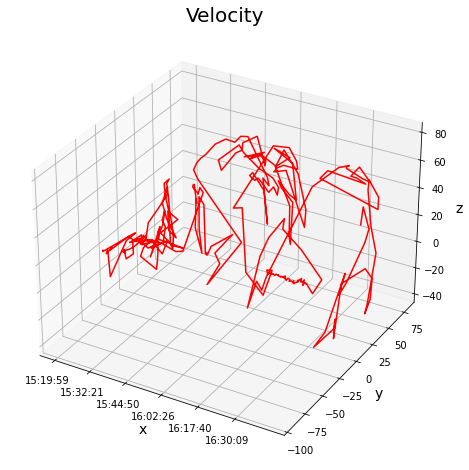

In [92]:
# Figureを追加
fig = plt.figure(figsize = (8, 8))

# 3DAxesを追加
ax = fig.add_subplot(111, projection='3d')

# Axesのタイトルを設定
ax.set_title("Velocity", size = 20)

# 軸ラベルを設定
ax.set_xlabel("x", size = 14)
ax.set_ylabel("y", size = 14)
ax.set_zlabel("z", size = 14)

# 軸目盛を設定
# ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
# ax.set_zticks([-1.0, -0.5, 0.0, 0.5, 1.0])

dat_n = len(gprmc)

int_t = [i for i in range(dat_n)]

x_ticks = np.arange(0, dat_n, 50)
ax.set_xticks(x_ticks)
ax.set_xticklabels(gprmc_datetime_list[i].time() for i in x_ticks)

# 曲線を描画
ax.plot(int_t, ve_list, vn_list, color = "red")

plt.show()